<a href="https://colab.research.google.com/github/cph316/generative_ai/blob/main/%E3%80%90HW4%E3%80%91%E6%B8%AC%E8%A9%A6(prompts)_(ChatGPT%E3%80%81Claude).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

請用 Python 撰寫一個程式，使其能夠在螢幕上顯示會隨機往下掉落的彩色球體，請確保運動符合物理定律。



1. ChatGPT-4o 撰寫的程式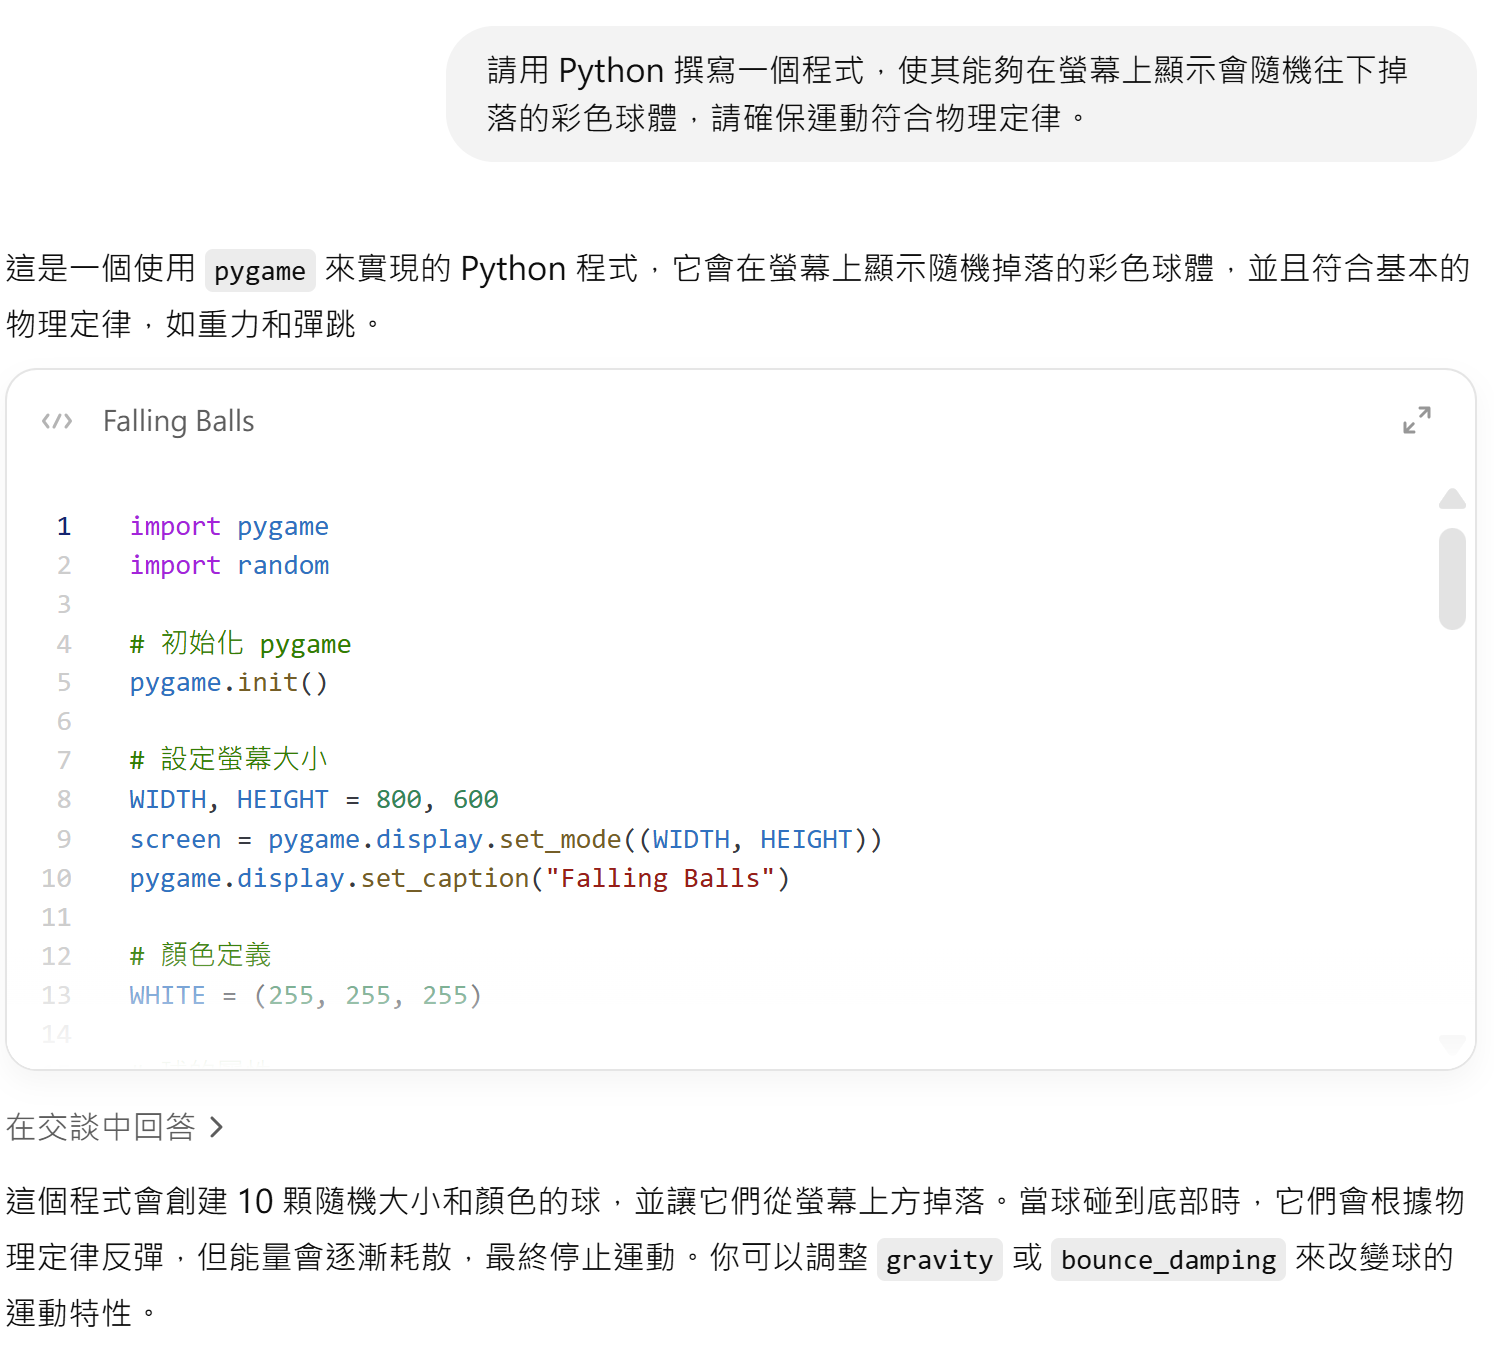

In [ ]:
import pygame
import random

# 初始化 pygame
pygame.init()

# 設定螢幕大小
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Falling Balls")

# 顏色定義
WHITE = (255, 255, 255)

# 球的屬性
class Ball:
    def __init__(self):
        self.radius = random.randint(10, 30)
        self.x = random.randint(self.radius, WIDTH - self.radius)
        self.y = random.randint(self.radius, HEIGHT // 3)
        self.color = (
            random.randint(0, 255),
            random.randint(0, 255),
            random.randint(0, 255)
        )
        self.velocity_y = 0  # 初速度
        self.gravity = 0.5  # 重力加速度
        self.bounce_damping = 0.7  # 彈性係數

    def update(self):
        self.velocity_y += self.gravity  # 速度因重力增加
        self.y += self.velocity_y  # 位置更新

        # 碰撞地面時反彈
        if self.y + self.radius >= HEIGHT:
            self.y = HEIGHT - self.radius  # 確保不穿透地面
            self.velocity_y = -self.velocity_y * self.bounce_damping  # 反彈並減速

            # 若速度過小則停止
            if abs(self.velocity_y) < 1:
                self.velocity_y = 0

    def draw(self, screen):
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), self.radius)

# 主要函數
def main():
    clock = pygame.time.Clock()
    balls = [Ball() for _ in range(10)]  # 生成 10 顆球
    running = True

    while running:
        screen.fill(WHITE)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        for ball in balls:
            ball.update()
            ball.draw(screen)

        pygame.display.flip()
        clock.tick(60)

    pygame.quit()

if __name__ == "__main__":
    main()


2. Claude-Sonnet 3.7 撰寫的程式
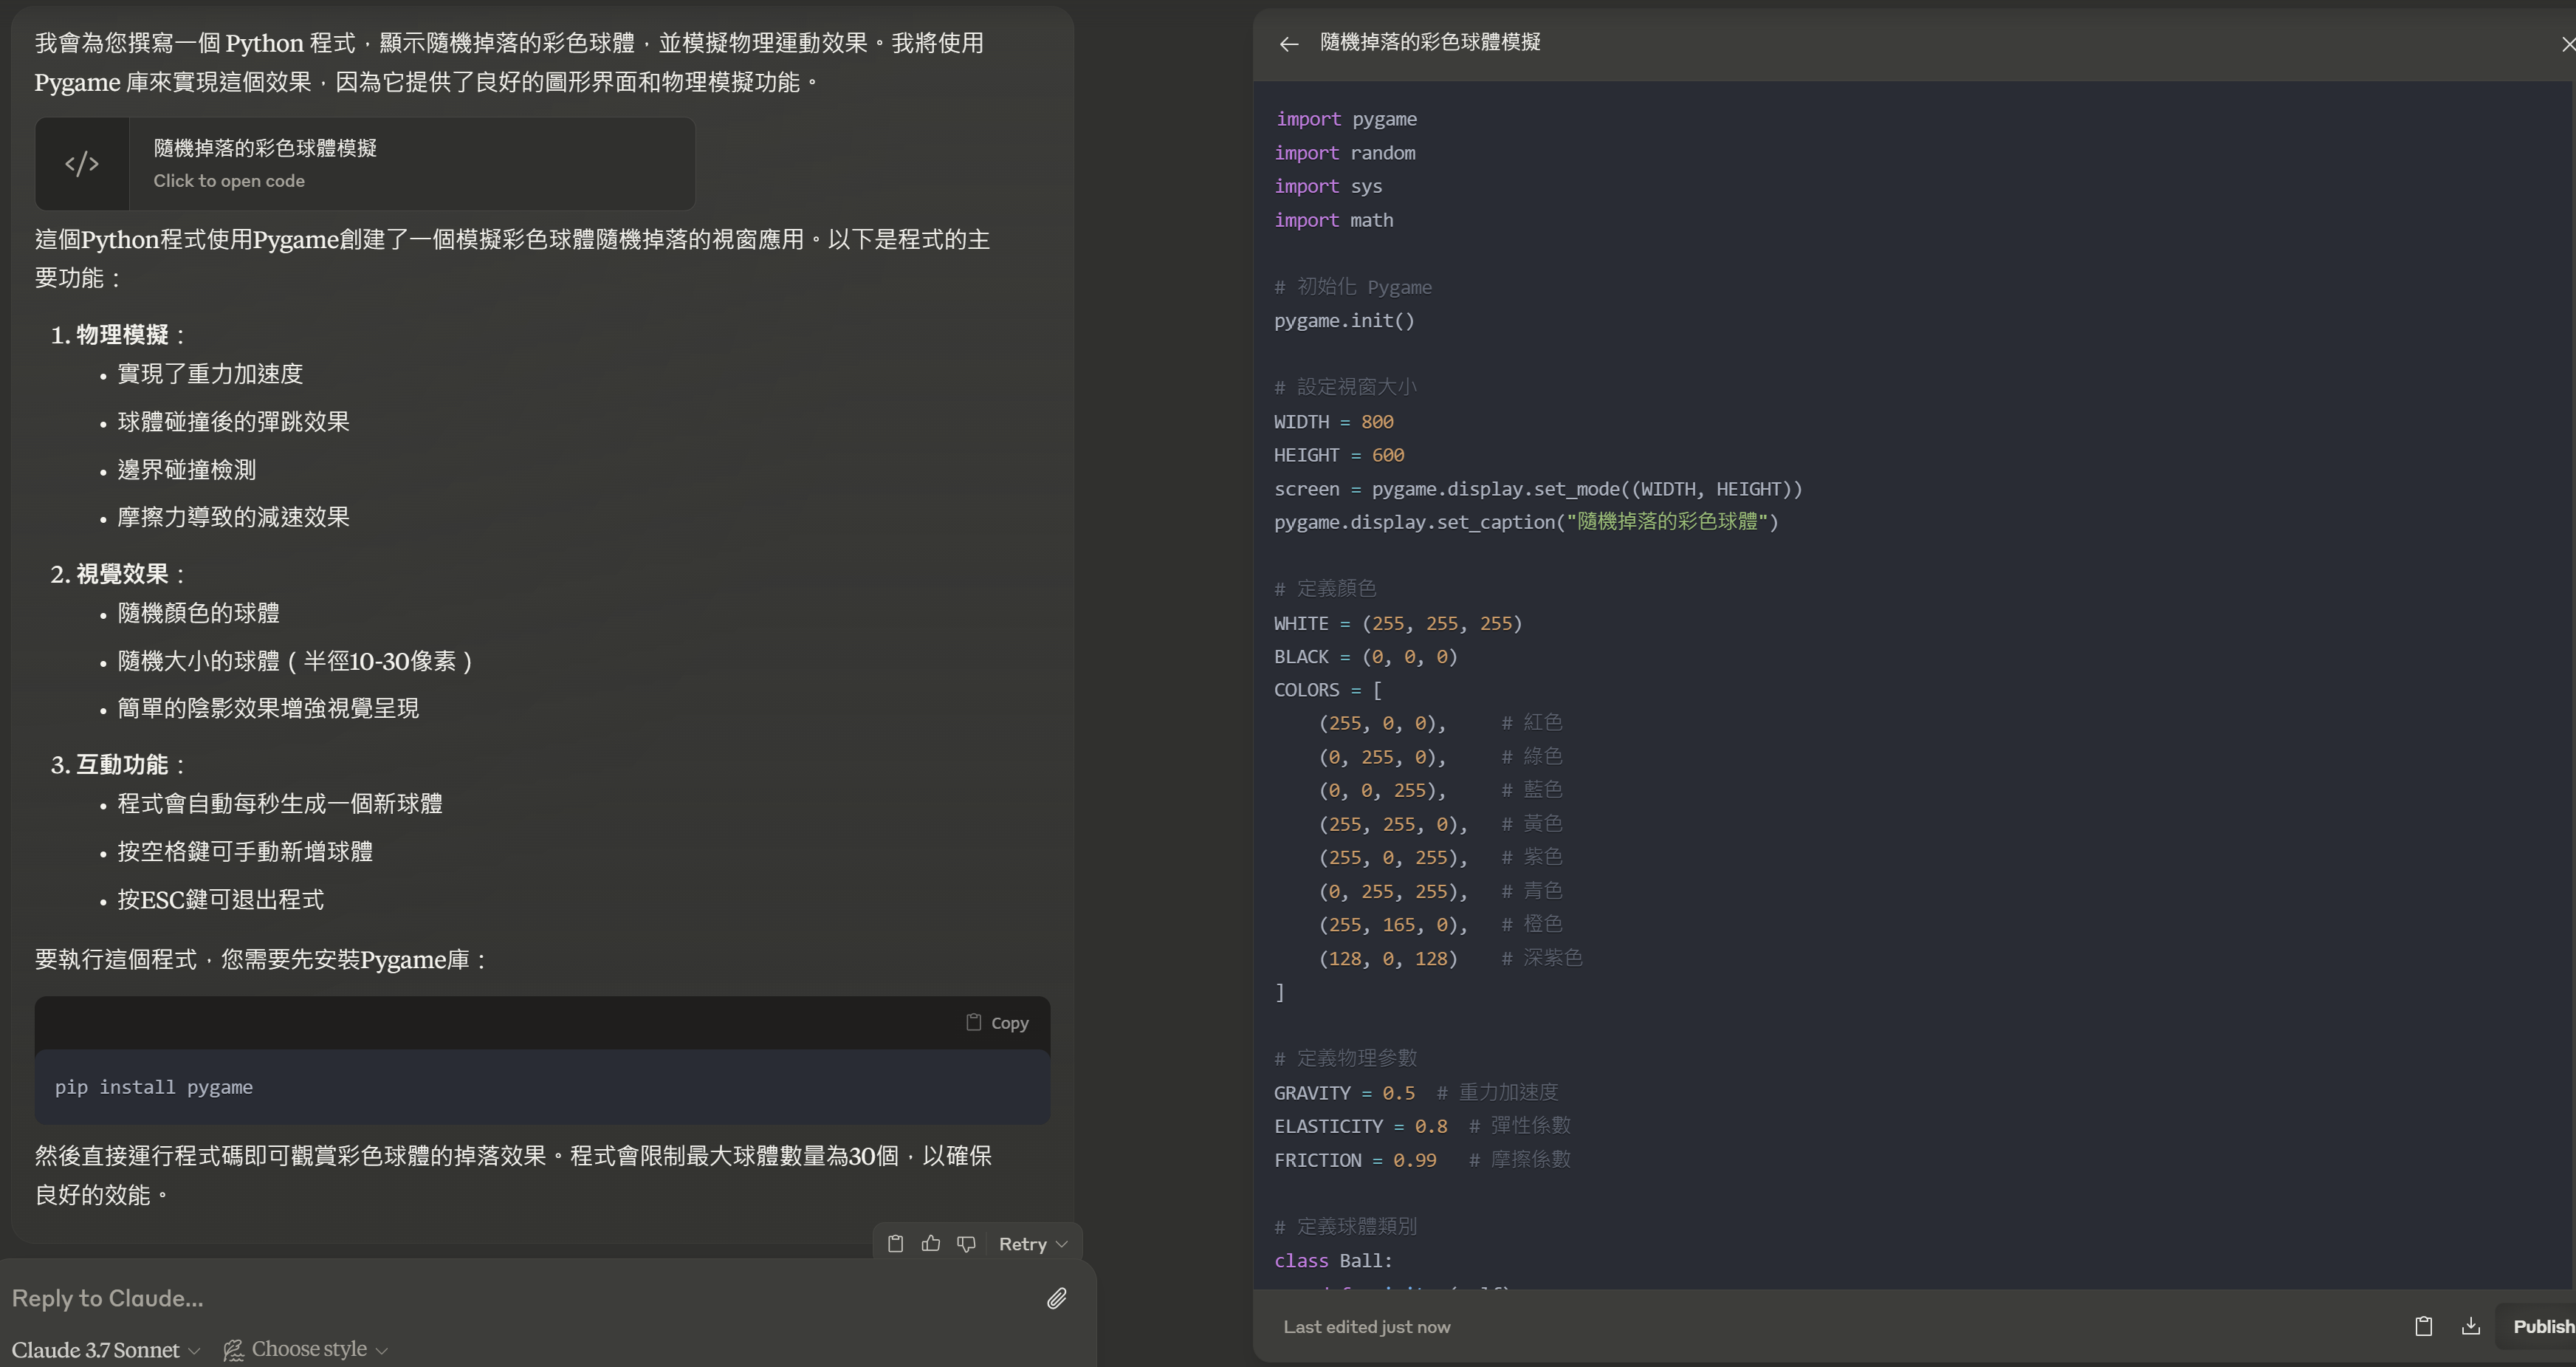

In [ ]:
import pygame
import random
import sys
import math

# 初始化 Pygame
pygame.init()

# 設定視窗大小
WIDTH = 800
HEIGHT = 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("隨機掉落的彩色球體")

# 定義顏色
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
COLORS = [
    (255, 0, 0),     # 紅色
    (0, 255, 0),     # 綠色
    (0, 0, 255),     # 藍色
    (255, 255, 0),   # 黃色
    (255, 0, 255),   # 紫色
    (0, 255, 255),   # 青色
    (255, 165, 0),   # 橙色
    (128, 0, 128)    # 深紫色
]

# 定義物理參數
GRAVITY = 0.5  # 重力加速度
ELASTICITY = 0.8  # 彈性係數
FRICTION = 0.99   # 摩擦係數

# 定義球體類別
class Ball:
    def __init__(self):
        self.radius = random.randint(10, 30)
        self.x = random.randint(self.radius, WIDTH - self.radius)
        self.y = -self.radius  # 起始位置在畫面上方
        self.color = random.choice(COLORS)
        self.vel_x = random.uniform(-2, 2)  # 初始水平速度
        self.vel_y = 0  # 初始垂直速度
        self.mass = self.radius * 0.5  # 質量與半徑成正比

    def update(self):
        # 應用重力
        self.vel_y += GRAVITY

        # 應用摩擦力
        self.vel_x *= FRICTION

        # 更新位置
        self.x += self.vel_x
        self.y += self.vel_y

        # 碰撞檢測：地面
        if self.y + self.radius > HEIGHT:
            self.y = HEIGHT - self.radius
            self.vel_y = -self.vel_y * ELASTICITY

            # 如果球體幾乎停止，停止其垂直運動
            if abs(self.vel_y) < 0.5:
                self.vel_y = 0

        # 碰撞檢測：左右邊界
        if self.x - self.radius < 0:
            self.x = self.radius
            self.vel_x = -self.vel_x * ELASTICITY
        elif self.x + self.radius > WIDTH:
            self.x = WIDTH - self.radius
            self.vel_x = -self.vel_x * ELASTICITY

    def draw(self):
        # 繪製球體
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), self.radius)

        # 繪製陰影效果
        for i in range(3):
            shadow_radius = self.radius - i*2
            if shadow_radius > 0:
                alpha = 100 - i*30
                if alpha > 0:
                    s = pygame.Surface((shadow_radius*2, shadow_radius*2), pygame.SRCALPHA)
                    pygame.draw.circle(s, (*self.color, alpha), (shadow_radius, shadow_radius), shadow_radius)
                    screen.blit(s, (int(self.x) - shadow_radius, int(self.y) - shadow_radius))

# 主遊戲循環
def main():
    clock = pygame.time.Clock()
    balls = []
    ball_spawn_timer = 0

    running = True
    while running:
        # 事件處理
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    running = False
                elif event.key == pygame.K_SPACE:
                    # 空格鍵新增一個球體
                    balls.append(Ball())

        # 每隔一段時間自動產生新球體
        ball_spawn_timer += 1
        if ball_spawn_timer >= 60:  # 每秒產生一個新球體 (假設 FPS = 60)
            balls.append(Ball())
            ball_spawn_timer = 0

        # 限制球體數量，避免效能問題
        if len(balls) > 30:
            balls.pop(0)  # 移除最早的球體

        # 更新所有球體
        for ball in balls:
            ball.update()

        # 清除畫面
        screen.fill(BLACK)

        # 繪製所有球體
        for ball in balls:
            ball.draw()

        # 更新畫面
        pygame.display.flip()

        # 控制幀率
        clock.tick(60)

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()

KeyboardInterrupt: 

1.ChatGPT 的球為同時落下並沒有隨機不同時間落下

2.Claude 的球會不斷隨機落下

3.兩者落下動作都符合物理狀態 但都會出現球體相疊的狀況

4.兩者相比 Claude對於程式的理解較好